In [464]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re
import plotly
plt.style.use('ggplot')

In [64]:
majestic_df = pd.read_csv('majestic6.csv', header=None)

In [65]:
majestic_df.columns = ['Name', 'Percentage of reviewers who would buy again', 'Number of Reviewers', 'Awards', 'Volume', 'ABV', 'Short Description', 'Long Description', 'Per Bottle Price', 'Mix Six Price', 'Type', 'Style', 'Closure', 'Units', 'Grape', 'Country']

In [66]:
next_df = pd.read_csv('majestic7.csv', header=None)
next_df.columns = ['Name', 'Percentage of reviewers who would buy again', 'Number of Reviewers', 'Awards', 'Volume', 'ABV', 'Short Description', 'Long Description', 'Per Bottle Price', 'Mix Six Price', 'Type', 'Style', 'Closure', 'Units', 'Grape', 'Country']

In [67]:
majestic_df = pd.concat([majestic_df, next_df], ignore_index=True)

In [68]:
next2 = pd.read_csv('majestic10.csv', header=None)
next2.columns = ['Name', 'Percentage of reviewers who would buy again', 'Number of Reviewers', 'Awards', 'Volume', 'ABV', 'Short Description', 'Long Description', 'Per Bottle Price', 'Mix Six Price', 'Type', 'Style', 'Closure', 'Units', 'Grape', 'Country']

In [69]:
majestic_df = pd.concat([majestic_df, next2], ignore_index=True)

In [70]:
next3 = pd.read_csv('majestic11.csv', header=None)
next3.columns = ['Name', 'Percentage of reviewers who would buy again', 'Number of Reviewers', 'Awards', 'Volume', 'ABV', 'Short Description', 'Long Description', 'Per Bottle Price', 'Mix Six Price', 'Type', 'Style', 'Closure', 'Units', 'Grape', 'Country']

In [71]:
majestic_df = pd.concat([majestic_df, next3], ignore_index=True)

In [72]:
next4 = pd.read_csv('majestic12.csv', header=None)
next4.columns = ['Name', 'Percentage of reviewers who would buy again', 'Number of Reviewers', 'Awards', 'Volume', 'ABV', 'Short Description', 'Long Description', 'Per Bottle Price', 'Mix Six Price', 'Type', 'Style', 'Closure', 'Units', 'Grape', 'Country']

In [73]:
majestic_df = pd.concat([majestic_df, next4], ignore_index=True)

In [75]:
majestic_df.drop_duplicates(subset=None, keep='first', inplace=True)

In [77]:
columnTitles=['Name', 'Country', 'Type', 'Style', 'Grape', 'Short Description', 'Long Description', 'Per Bottle Price', 'Mix Six Price', 'Percentage of reviewers who would buy again', 'Number of Reviewers', 'Awards', 'Closure', 'ABV', 'Units', 'Volume']

In [78]:
majestic_df=majestic_df.reindex(columns=columnTitles)

In [124]:
majestic_df.to_csv('majestic_df.csv', encoding='utf-8', index=False)

In [189]:
copy = majestic_df.copy()

In [194]:
copy['Mix Six Price'] = pd.to_numeric(copy['Mix Six Price'])

In [199]:
copy['Savings'] = copy['Per Bottle Price']-copy['Mix Six Price']

In [201]:
copy['Percent Saved'] = round(copy['Savings']/copy['Per Bottle Price']*100, 0)

In [203]:
majestic_df['Mix Six Price'] = pd.to_numeric(majestic_df['Mix Six Price'])

In [204]:
majestic_df['Savings'] = majestic_df['Per Bottle Price']-majestic_df['Mix Six Price']

In [205]:
majestic_df['Percent Saved'] = round(majestic_df['Savings']/majestic_df['Per Bottle Price']*100, 0)

In [415]:
copy['price_for_75cl'] = (copy['Per Bottle Price']/copy['Volume'])*75

In [416]:
majestic_df['price_for_75cl'] = (majestic_df['Per Bottle Price']/majestic_df['Volume'])*75

In [477]:
copy = copy.replace({'[]': 0})

In [479]:
copy['awards_num'] = copy['Awards']

In [482]:
if copy.Awards != 0:
    

0                                                      0
1      ['IWC 2019 - Commended Award', 'Decanter 2019 ...
2                                                      0
3                                                      0
4      ['IWC 2019 - Bronze Award', 'IWC 2018 - Commen...
5                            ['IWC 2019 - Bronze Award']
6                                                      0
7                       ['Decanter 2019 - Bronze Award']
8                                                      0
9                                                      0
10                        ['IWC 2019 - Commended Award']
11     ['IWC 2019 - Silver Award', 'IWC 2017 - Commen...
12                                                     0
13                                                     0
14     ['IWC 2019 - Commended Award', 'IWC 2018 - Com...
15                                                     0
16                                                     0
17                             

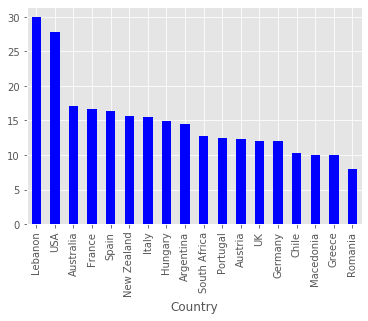

In [220]:
# Just 5 from Lebanon
copy.groupby('Country')['Per Bottle Price'].mean().sort_values(ascending=False).plot.bar(color='b')

In [233]:
outliers = majestic_df[['Per Bottle Price']]
outliers = outliers.loc[outliers.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

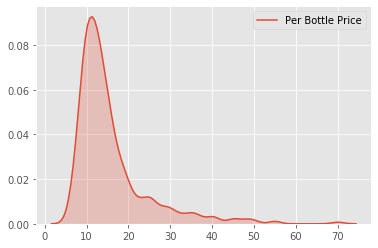

In [234]:
sns.kdeplot(outliers['Per Bottle Price'], shade=True)

Text(0, 0.5, 'Average Price (adjusted for 75cl)')

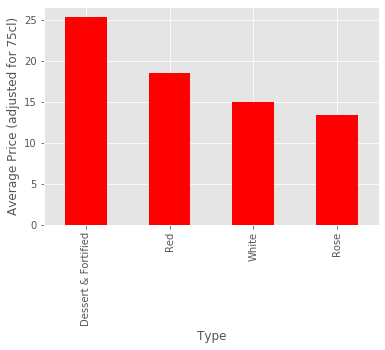

In [420]:
copy.groupby('Type')['price_for_75cl'].mean().sort_values(ascending=False).plot.bar(color='r')
plt.ylabel('Average Price (adjusted for 75cl)')

In [257]:
not_enough = copy
not_enough = not_enough[not_enough['Short Description'] != 'FRANCE']
not_enough = not_enough[not_enough['Short Description'] != 'SPAIN']
not_enough = not_enough[not_enough['Short Description'] != 'ITALY']
not_enough = not_enough[not_enough['Short Description'] != 'CHILE']

Text(0.5, 0, '')

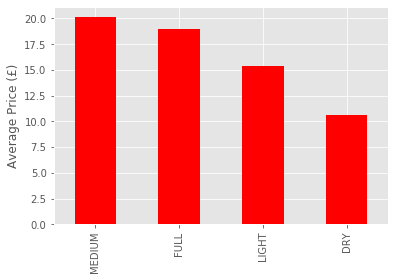

In [442]:
### Price averages for Red Wine

not_enough[not_enough['Type']=='Red'].groupby('Short Description')['Per Bottle Price'].mean().sort_values(ascending=False).plot.bar(color='r')
plt.ylabel('Average Price (£)')
plt.xlabel('')

In [268]:
not_whi = copy
not_whi = not_whi[not_whi['Short Description'] != 'PORTUGAL']
not_whi = not_whi[not_whi['Short Description'] != 'HUNGARY']
not_whi = not_whi[not_whi['Short Description'] != 'NEW ZEALAND']
not_whi = not_whi[not_whi['Short Description'] != 'FRANCE']

Text(0.5, 0, '')

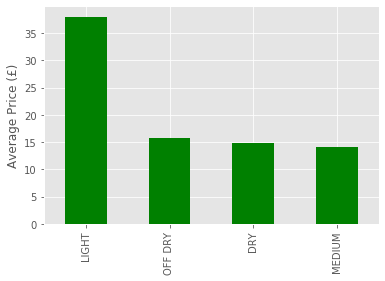

In [441]:
### Price avgs for White
not_whi[not_whi['Type']=='White'].groupby('Short Description')['Per Bottle Price'].mean().sort_values(ascending=False).plot.bar(color='g')
plt.ylabel('Average Price (£)')
plt.xlabel('')

In [291]:
copy['Number of Reviewers'] = copy['Number of Reviewers'].fillna(0)
majestic_df['Number of Reviewers'] = majestic_df['Number of Reviewers'].fillna(0)

In [357]:
copy = copy.replace({'1,565':'1565'})

In [360]:
copy = copy.replace({'1,601':'1601'})

In [362]:
majestic_df = majestic_df.replace({'1,565':'1565'})

In [363]:
majestic_df = majestic_df.replace({'1,601':'1601'})

In [368]:
majestic_df['Number of Reviewers'] = pd.to_numeric(majestic_df['Number of Reviewers'])

In [367]:
copy['Number of Reviewers'] = pd.to_numeric(copy['Number of Reviewers'])


Text(0, 0.5, 'Bottles')

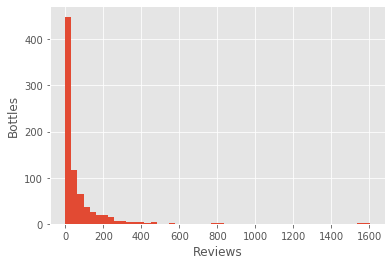

In [445]:
### Masses never reveiwed

plt.hist(copy['Number of Reviewers'], bins=50)
plt.xlabel('Reviews')
plt.ylabel('Bottles')

In [452]:
reviewer_subset = copy[copy['Number of Reviewers']>40]

Text(0, 0.5, '% who would buy again')

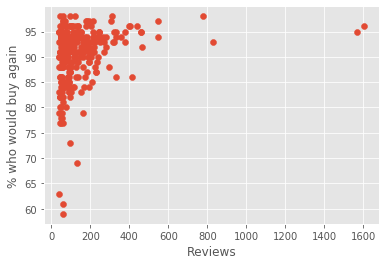

In [446]:
plt.scatter(reviewer_subset['Number of Reviewers'], reviewer_subset['Percentage of reviewers who would buy again'])
plt.xlabel('Reviews')
plt.ylabel('% who would buy again')

In [410]:
##### Most reviewed wines - two Whites from New Zealand, A red from Spain and a red from Portugal.
## Portugese Red recommended by celebrity chef.


copy[copy['Number of Reviewers']>600]

,Name,Country,Type,Style,Grape,Short Description,Long Description,Per Bottle Price,Mix Six Price,Percentage of reviewers who would buy again,Number of Reviewers,Awards,Closure,ABV,Units,Volume,Savings,Percent Saved
6,The Guv'nor,Spain,Red,Smooth Red,NaN,FULL,The Guv'nor is made by our favourite winemaker...,8.99,6.99,93.0,830.0,[],NaN,14%,10.5,75.0,2.0,22.0
29,The Ned Waihopai River Sauvignon Blanc 2018 Ma...,New Zealand,White,Fruity White,NaN,DRY,It's our best-ever-selling white for good reas...,10.99,8.99,95.0,1565.0,"['IWC 2019 - Commended Award', 'IWC 2018 - Bro...",Screwcap,13%,9.8,75.0,2.0,18.0
34,Porta 6 2017 Lisboa,Portugal,Red,Smooth Red,NaN,FULL,Celebrity chef James Martin called Porta 6 'on...,8.99,7.99,96.0,1601.0,"['IWC 2019 - Commended Award', 'IWC 2018 - Com...",Natural Cork,13.5%,10.1,75.0,1.0,11.0
44,Villa Maria Private Bin Sauvignon Blanc 2018/1...,New Zealand,White,Fruity White,NaN,DRY,"Wine advocate's Joe Czerwinski said: ""Villa Ma...",10.99,8.99,98.0,777.0,"['IWC 2018 - Commended Award', 'IWC 2017 - Bro...",Screwcap,13%,9.8,75.0,2.0,18.0


Text(0, 0.5, 'Average Price Per Bottle (£)')

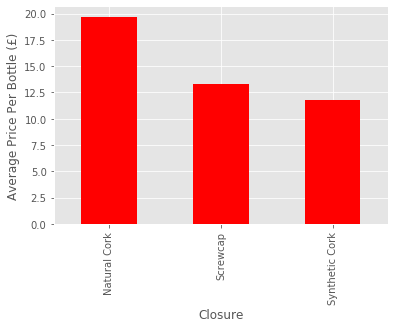

In [423]:
copy.groupby('Closure')['price_for_75cl'].mean().sort_values(ascending=False).plot.bar(color='r')
plt.ylabel('Average Price Per Bottle (£)')

### only 5 with synthetic corks
